# 고객이탈에 관한 예측 및 시각화 분석 

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from collections import Counter
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder, StandardScaler as ss, MinMaxScaler as mms
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split

In [2]:
df = pd.read_csv('C:/Users/kwnjh/Desktop/project/BankChurners.csv')
df = df.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1'], axis=1)
df = df.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis=1)
df = df.drop('CLIENTNUM', axis=1)
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [3]:
X = df.drop('Attrition_Flag', axis = 1)
y = df['Attrition_Flag']

## 카테고리별 분석 및 시각화

- 데이터 상 약 84%의 고객이 가입이 되어있으며, 그외 약 16%는 이탈고객으로 나와있습니다. 

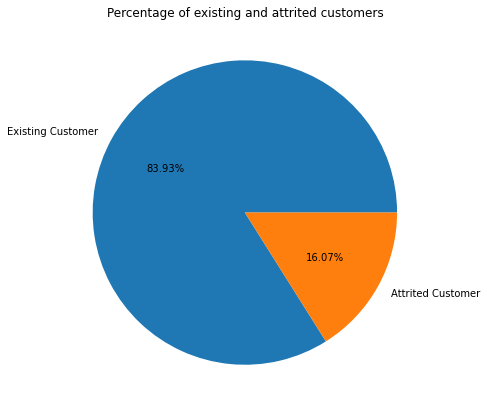

In [4]:
fig, ax = plt.subplots(figsize=(7,7))
count = Counter(y)
ax.pie(count.values(), labels = count.keys(), autopct = lambda p: f'{p:.2f}%')
ax.set_title('Percentage of existing and attrited customers')
plt.show()

- 고객의 교육수준을 알려주는 그래프이며, 교육을 받지 못한 고객은 1500명으로 나와있습니다.

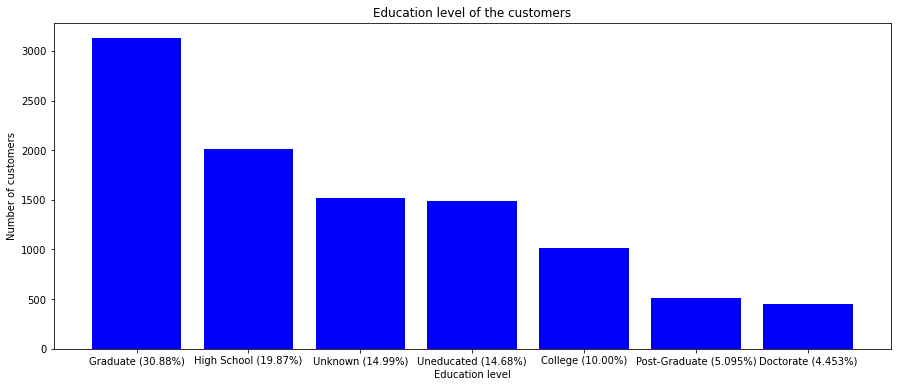

In [5]:
fig, ax = plt.subplots(figsize=(15,6))
count = Counter(X['Education_Level'])
count = pd.Series(count).sort_values(ascending = False)
labels = []

for i in count.keys():
    labels.append(i + ' (' + str(count[i]/len(X['Education_Level'])*100)[:5] + '%)')

plt.bar(labels, count, color = 'blue')
plt.title('Education level of the customers')
plt.xlabel('Education level')
plt.ylabel('Number of customers')
plt.show()

- 고객의 성별분포는 상대적으로 동일하지만, 여성이 남성보다 약 3% 가량 많습니다.

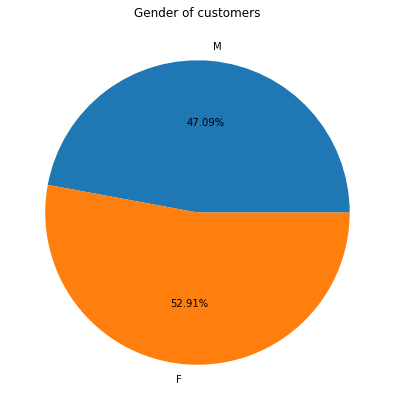

In [6]:
fig, ax = plt.subplots(figsize = (7,7))
count = Counter(X['Gender'])

ax.pie(count.values(), labels = count.keys(), autopct = lambda p: f'{p:.2f}%')
ax.set_title('Gender of customers')
plt.show()

- 고객의 혼인여부를 보면 대부분의 고객들이 결혼하였으며, 약 40%는 미혼, 7%는 이혼, 그 외는 정보를 알수 없는 것으로 나타났습니다. 

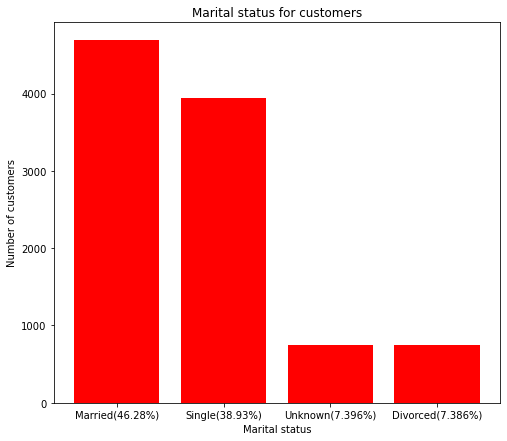

In [7]:
fig, ax = plt.subplots(figsize = (8, 7))
count = Counter(X['Marital_Status'])
labels = []

for i in count:
    labels.append(i + '(' + str(count[i]/len(X['Marital_Status'])*100)[:5] + '%)')
    
plt.bar(labels, count.values(), color = 'red')
plt.title('Marital status for customers')
plt.ylabel('Number of customers')
plt.xlabel('Marital status')
plt.show()

- 고객의 대다수는 Blue(93%)를 사용하고 있으며, 실버(5%), 골드(1%), 플래티넘(0.2%) 순으로 사용하고 있습니다.

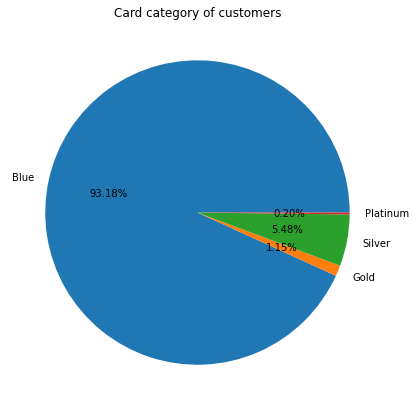

In [8]:
fix, ax = plt.subplots(figsize=(7,7))
count = Counter(X['Card_Category'])

ax.pie(count.values(), labels = count.keys(), autopct = lambda p:f'{p:.2f}%')
ax.set_title('Card category of customers')
plt.show()

- 고객들 간의 관계도 3명(22%), 4명, 5명, 6명 각각 18%을 차지하고 있습니다. 

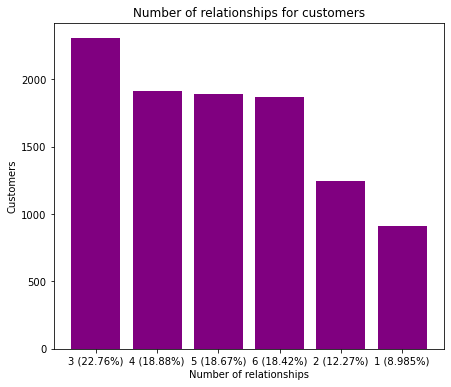

In [9]:
fig, ax = plt.subplots(figsize=(7, 6))
count = Counter(X['Total_Relationship_Count'])
count = pd.Series(count).sort_values(ascending = False)
labels = []

for i in count.keys():
    labels.append(str(i) + ' (' + str(count[i]/len(X['Total_Relationship_Count'])*100)[:5] + '%)')
    
plt.bar(labels, count, color = 'purple')
plt.title('Number of relationships for customers')
plt.ylabel('Customers')
plt.xlabel('Number of relationships')
plt.show()

- 고객의 수입을 보면 40K 미만(35%), 그 다음으로는 40-60K(18%) 순으로 나타났습니다.

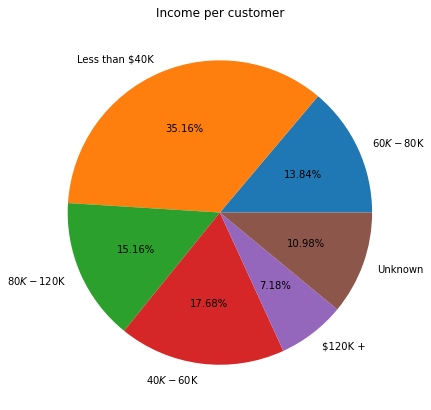

In [10]:
fig, ax = plt.subplots(figsize=(8, 7))
count = Counter(X['Income_Category'])

ax.pie(count.values(), labels = count.keys(), autopct = lambda p:f'{p:.2f}%')
ax.set_title('Income per customer')
plt.show()

## 수치화 시각분석

- 데이터셋 간의 상관관계가 존재합니다.

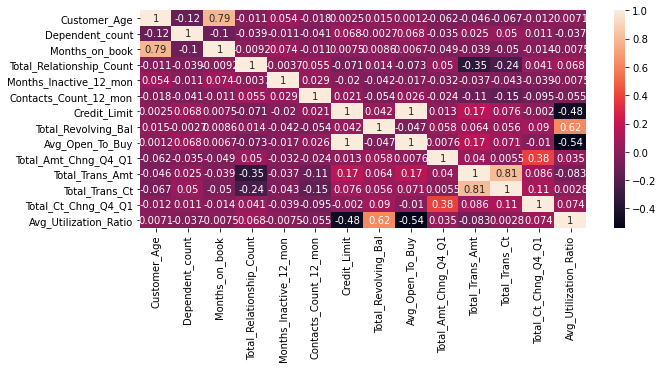

In [11]:
fig, ax = plt.subplots(figsize=(10,4))
sns.heatmap(X.corr(), annot = True)
plt.show()

- 상관관계의 시각화분석을 위해 상관관계가 가장 큰 6개 항목('Total_Trans_Amt' 과 'Total_Trans_Ct', 'Total_Revolving_Bal' 과 'Avg_Utilization_Ratio', 'Months_on_book' 과 'Customer_Age') 을 확인해봤습니다.

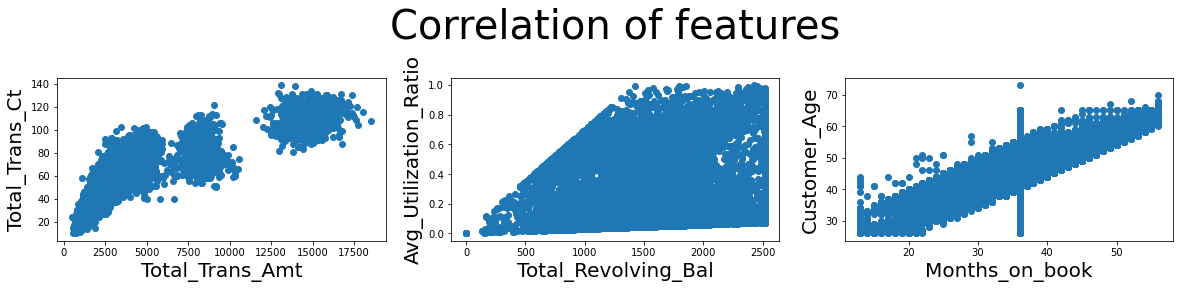

In [12]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (20,3))

ax1.scatter(X['Total_Trans_Amt'], df['Total_Trans_Ct'])
ax2.scatter(X['Total_Revolving_Bal'], df['Avg_Utilization_Ratio'])
ax3.scatter(X['Months_on_book'], df['Customer_Age'])

ax1.set_xlabel('Total_Trans_Amt', fontsize=20)
ax1.set_ylabel('Total_Trans_Ct', fontsize=20)

ax2.set_xlabel('Total_Revolving_Bal', fontsize=20)
ax2.set_ylabel('Avg_Utilization_Ratio', fontsize=20)

ax3.set_xlabel('Months_on_book', fontsize=20)
ax3.set_ylabel('Customer_Age', fontsize=20)

ax2.set_title('Correlation of features', fontsize=40, pad=40)

plt.show()

- 최소 균등하게 분포된 5개의 항목 분포를 확인하였고 로그변환, Box cox, 표준 스케일러 및 최소최대 스케일러에 관한 변화를 확인하였습니다.

- 아래 그래프는 'Credit_Limit' 및 'Avg_Utilization_Ratio'가 변환없이 가장 잘 작동 함을 보여줍니다. 'Avg_Open_To_Buy'및 'Total_Amt_Chng_Q4_Q1'은 Box cox에서 가장 좋았으며,  'Total_Trans_amt'에는 로그 변환이 필요한 것으로 확인하였습니다.

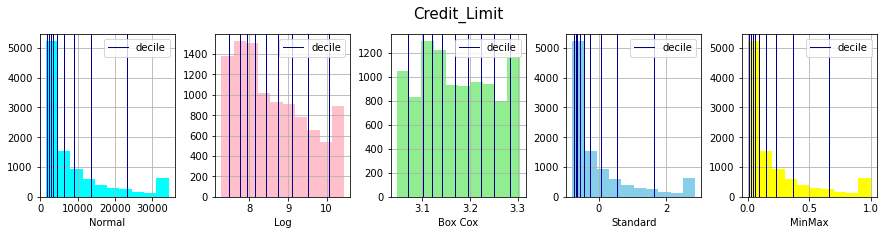

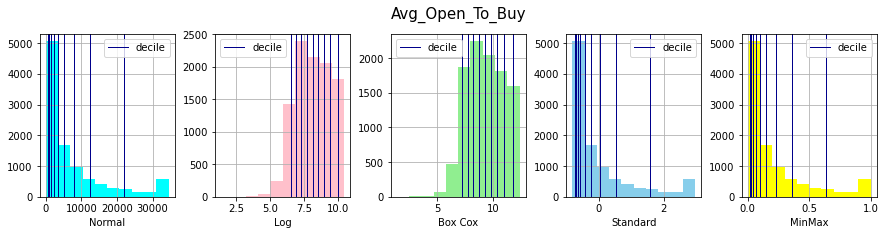

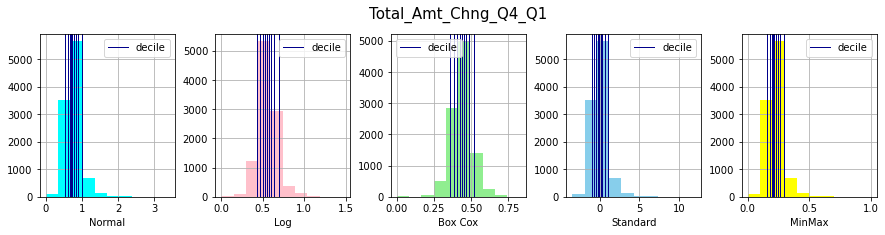

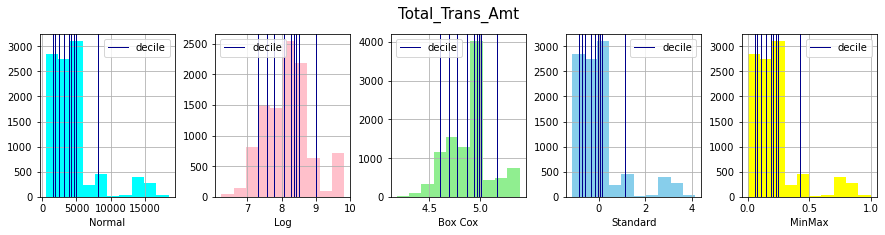

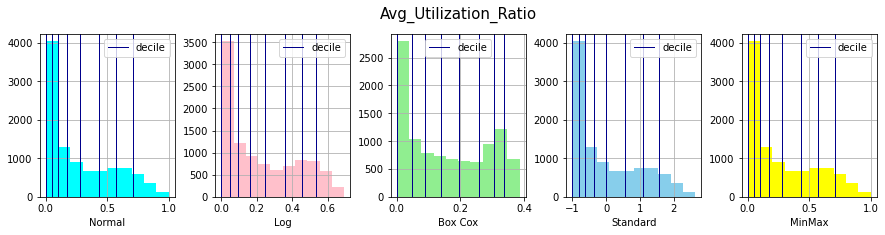

In [13]:
cols =['Credit_Limit','Avg_Open_To_Buy','Total_Amt_Chng_Q4_Q1','Total_Trans_Amt','Avg_Utilization_Ratio']

for col in cols:
    i = 0
    
    fig, axes = plt.subplots(1, 5, figsize=(15, 3))
    
    f1 = df[col]
    f2 = (df[col]+1).transform(np.log)
    f3 = pd.DataFrame(stats.boxcox(df[col]+1)[0])
    f4 = pd.DataFrame(ss().fit_transform(np.array(df[col]).reshape(-1, 1)))
    f5 = pd.DataFrame(mms().fit_transform(np.array(df[col]).reshape(-1, 1)))
    
    for column in [[f1, 'cyan', 'Normal'], [f2, 'pink', 'Log'], [f3, 'lightgreen', 'Box Cox'], 
                   [f4, 'skyblue', 'Standard'], [f5, 'yellow', 'MinMax']]:
        feature = column[0]
        colour = column[1]
        name = column[2]
        
        feature.hist(ax=axes[i], color=colour)
        deciles = feature.quantile([.1, .2, .3, .4, .5, .6, .7, .8, .9])
        
        for pos in np.array(deciles).reshape(1, -1)[0]:
            handle = axes[i].axvline(pos, color='darkblue', linewidth=1)

        axes[i].legend([handle], ['decile'])
        axes[i].set_xlabel(name)
        
        i += 1 
    
    axes[2].set_title(col, fontsize=15, pad=15)
    axes[3].set_title('')
    axes[4].set_title('')
    
    plt.show()

plt.show()

In [14]:
X['Credit_Limit'] = X['Credit_Limit']
X['Avg_Open_To_Buy'] = stats.boxcox(X['Avg_Open_To_Buy']+1)[0]
X['Total_Amt_Chng_Q4_Q1'] = stats.boxcox(X['Total_Amt_Chng_Q4_Q1']+1)[0]
X['Total_Trans_Amt'] = (X['Total_Trans_Amt']+1).transform(np.log)
X['Avg_Utilization_Ratio'] = X['Avg_Utilization_Ratio']

- 가장 넓은 범위의 값을 가진 5개의 항목에 대한 몇가지 Bin을 수행하였으며, 각 항목의 고유한 카테고리의 수를 수천개에서 100개로 줄여봤습니다.

In [15]:
for i in ['Credit_Limit', 'Total_Revolving_Bal','Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 
            'Total_Trans_Amt']:
    col = X[i]
    diff = col.max() - col.min()
    bins = np.digitize(col, np.arange(col.min(), col.max(), (diff/100)).tolist())
    X[i + '_bin'] = bins

- 마지막으로 'Credit_Limit_bin'을 제외하고는 Bin된 변수의 분포가 대략 중앙에 있음을 확인할 수 있었습니다.

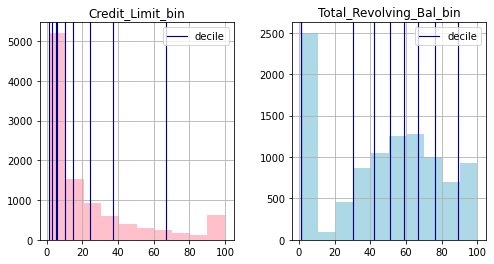

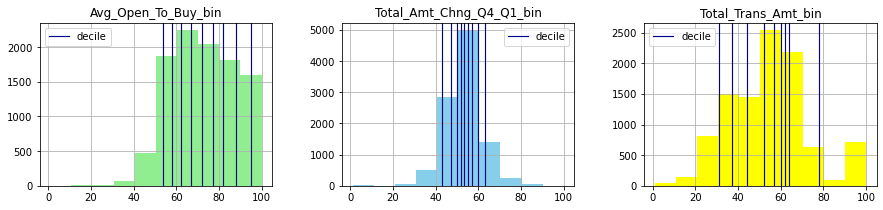

In [16]:
i = 0
cols = ['Credit_Limit_bin', 'Total_Revolving_Bal_bin', 'Avg_Open_To_Buy_bin', 'Total_Amt_Chng_Q4_Q1_bin',
        'Total_Trans_Amt_bin']
colours = ['pink', 'lightblue', 'lightgreen', 'skyblue', 'yellow']

fig1, axes1 = plt.subplots(1, 2, figsize = (8, 4))
fig2, axes2 = plt.subplots(1, 3, figsize = (15,3))

for ax in axes1:
    col = X[cols[i]]
    pd.DataFrame(col).hist(ax=ax, color=colours[i])
    deciles = col.quantile([.1, .2, .3, .4, .5, .6, .7, .8, .9])
    
    for pos in deciles:
        handle = ax.axvline(pos, color='darkblue', linewidth=1.15)
    
    ax.legend([handle], ['decile'])
    i += 1
    
for ax in axes2:
    col = X[cols[i]]
    pd.DataFrame(col).hist(ax=ax, color=colours[i])
    deciles = col.quantile([.1, .2, .3, .4, .5, .6, .7, .8, .9])
    
    for pos in deciles:
        handle = ax.axvline(pos, color='darkblue', linewidth=1.15)
    
    ax.legend([handle], ['decile'])
    i += 1
    
plt.show()

## 고객이탈 예측

- 데이터셋를 사용하여 고객의 이탈여부에 대하여 예측을 해봤습니다. 

- 먼저 LabelEncoder를 사용하여 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category' 및 'Card_Category'열을 범주에서 숫자로 변환하였습니다. 그 후 X와 y를 학습 및 테스트 데이터 세트로 분할하였으며, 학습데이터 X는 80 %로 편성하고, 테스트에는 20 %로 편성하였습니다.

In [17]:
cat_cols = ['Gender','Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']

for col in cat_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    
le = LabelEncoder()
y = le.fit_transform(y)
X = X.drop(['Credit_Limit', 'Total_Revolving_Bal_bin', 'Avg_Open_To_Buy_bin', 'Total_Amt_Chng_Q4_Q1_bin',
            'Total_Trans_Amt_bin'], axis=1)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [19]:
count = Counter(y_train)
print('Distribution of target 1 & 2:', count[1], '&', count[0])

Distribution of target 1 & 2: 6791 & 1310


- '0' 타겟은 '1'타겟보다 샘플이 5 배 정도 작은 것으로 나왔습니다. 그래서 SMOTE를 사용하여 리샘플링하여 둘 다 균등하게 하였습니다.

In [20]:
smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)

In [21]:
count = Counter(y_train)
print('Distribution of target 1 & 2:', count[1], '&', count[0])

Distribution of target 1 & 2: 6791 & 6791


- 아래는 출력에 가장 적합한 분류기를 적용해봤습니다. 
사용된 예측 변수는 XGBoost, Random Forest, K Nearest Neighbours, SGD Classifier 및 SVC입니다.

In [22]:
classifiers = [[XGBClassifier(),'XGB Classifier'], [RandomForestClassifier(),'Random Forest'], 
    [KNeighborsClassifier(), 'K-Nearest Neighbours'], [SGDClassifier(),'SGD Classifier'], [SVC(),'SVC']]

- 모델의 결과를 평가하기 위해서 모델을 반복 학습하였으며, 훈련세트에 Score, cross_val 및 roc_auc 에 관한 예측해봤습니다.

In [23]:
score_list = []
cross_val_list = []
roc_auc_list = []

for classifier in classifiers:
    model = classifier[0]
    model.fit(X_train, y_train)
    model_name = classifier[1]
    pred = model.predict(X_test)
    score = model.score(X_test, y_test)
    cross_val = cross_val_score(model, X_test, y_test).mean()
    roc_auc = roc_auc_score(y_test, pred)
    
    score_list.append(score)
    cross_val_list.append(cross_val)
    roc_auc_list.append(roc_auc)
    
    print(model_name, 'model score:     ' + str(round(score*100, 2)) + '%')
    print(model_name, 'cross val score: ' +str(round(cross_val*100, 2)) + '%')
    print(model_name, 'roc auc score:   ' + str(round(roc_auc*100, 2)) + '%')
    
    if model_name != classifiers[-1][1]:
        print('')

[18:12:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\kwnjh\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\kwnjh\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:13:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:13:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:13:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:13:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

- XGBoost와 Random Forest는 나머지 분류기보다 압도합니다. 그러나 작은 마진을 통해 최적의 모델은 XGBoost Classifier로 나왔습니다. 이 예측기는 97%, 95% 및 94%의 매우 높은 정확도를 달성합니다.

- Random Forest는 96%, 94% 및 93%로 확인되었습니다.

- K-Nearest Neighbors는 82%, 88%, 80%로 확인되었습니다.

- SGD와 SVC분류기는 73%~98%로 확인되었습니다.

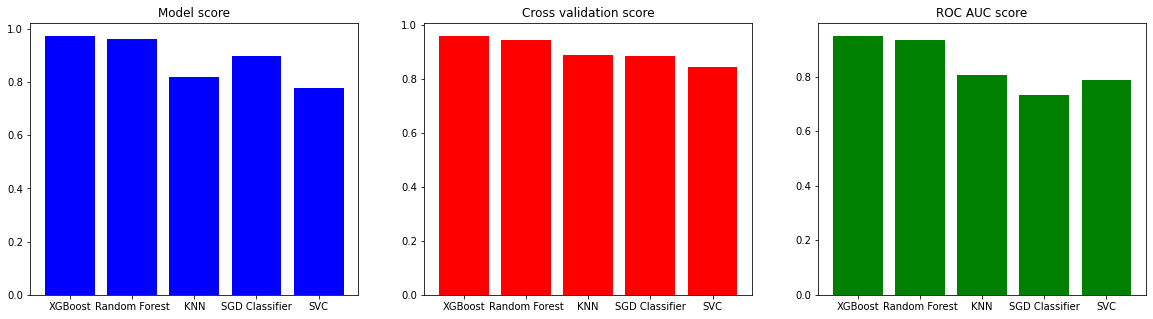

In [24]:
labels = ['XGBoost', 'Random Forest', 'KNN', 'SGD Classifier', 'SVC']
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 5))

ax1.bar(labels, score_list, color='blue')
ax2.bar(labels, cross_val_list, color='red')
ax3.bar(labels, roc_auc_list, color='green')

ax1.set_title('Model score')
ax2.set_title('Cross validation score')
ax3.set_title('ROC AUC score')

plt.show()

- 최종으로 사용될 XGBoost분류기며, 그 결과는 아래로 확인하였습니다.

In [25]:
model = XGBClassifier()
model.fit(X_train, y_train)
pred = model.predict(X_test)

score = model.score(X_test, y_test)
cross_val = cross_val_score(model, X_test, y_test).mean()
roc_auc = roc_auc_score(y_test, pred)

print('model score:     ' + str(round(score*100, 2)) + '%')
print('cross val score: ' +str(round(cross_val*100, 2)) + '%')
print('roc auc score:   ' + str(round(roc_auc*100, 2)) + '%')

C:\Users\kwnjh\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:13:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\kwnjh\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:13:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:13:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:13:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:13:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel